<a href="https://colab.research.google.com/github/Gkcoli/-CCMACLRL_EXAM_COM222-ML/blob/main/Exercise%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import


In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import log_loss
from seaborn import load_dataset
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder


#  Dataset File


In [ ]:
dataset_url = 'https://github.com/robitussin/CCMACLRL_EXERCISES/blob/f5fdfba1aabbbafcf2fe49ca6e1c8f92f69d1458/datasets/titanic/train.csv?raw=true'
df = pd.read_csv(dataset_url)
df = load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Test File


In [ ]:
test_url = 'https://github.com/robitussin/CCMACLRL_EXERCISES/blob/f5fdfba1aabbbafcf2fe49ca6e1c8f92f69d1458/datasets/titanic/test.csv?raw=true'
dt=pd.read_csv(test_url)

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


#Sample Submission File


In [ ]:
sample_submission_url ='https://github.com/robitussin/CCMACLRL_EXERCISES/blob/f5fdfba1aabbbafcf2fe49ca6e1c8f92f69d1458/datasets/titanic/gender_submission.csv?raw=true'

sf=pd.read_csv(sample_submission_url)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
 df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [ ]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,0.675824,1.192308,35.623187,0.467033,0.478022,78.919735
std,0.469357,0.516411,15.671615,0.645007,0.755869,76.490774
min,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,1.000000,1.000000,47.750000,1.000000,1.000000,90.000000
max,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [ ]:
df = df[['survived', 'age', 'sex', 'pclass']]
df.head()
df = pd.get_dummies(df, columns=['sex', 'pclass'])
df.dropna(inplace=True)
df.head()

,survived,age,sex_female,sex_male,pclass_1,pclass_2,pclass_3
1,1,38.0,True,False,True,False,False
3,1,35.0,True,False,True,False,False
6,0,54.0,False,True,True,False,False
10,1,4.0,True,False,False,False,True
11,1,58.0,True,False,True,False,False


In [ ]:
from sklearn.model_selection import train_test_split

x = df.drop('survived', axis=1)
y = df['survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)

In [ ]:
model = LogisticRegression(random_state=0)
model.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
model.score(x_test, y_test)

0.7027027027027027

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, x, y, cv=5).mean()

0.762912912912913

In [ ]:
from sklearn.metrics import confusion_matrix

y_predicted = model.predict(x_test)
confusion_matrix(y_test, y_predicted)

array([[ 8,  4],
       [ 7, 18]])

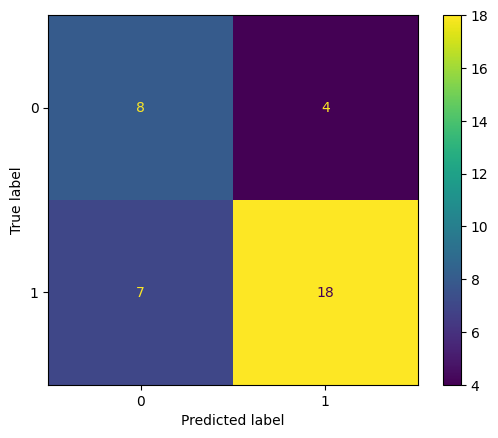

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predicted)


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.53      0.67      0.59        12
           1       0.82      0.72      0.77        25

    accuracy                           0.70        37
   macro avg       0.68      0.69      0.68        37
weighted avg       0.73      0.70      0.71        37



In [ ]:
female = [[30, 1, 0, 1, 0, 0]]
model.predict(female)[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


1

In [ ]:
probability = model.predict_proba(female)[0][1]
print(f'Probability of survival: {probability:.1%}')

Probability of survival: 93.6%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
male = [[60, 0, 1, 0, 0, 1]]
probability = model.predict_proba(male)[0][1]
print(f'Probability of survival: {probability:.1%}')

Probability of survival: 16.0%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
label_encoder = LabelEncoder()
df['survived'] = label_encoder.fit_transform(df['survived'])


In [ ]:
dt

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 1 to 889
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    182 non-null    int64  
 1   age         182 non-null    float64
 2   sex_female  182 non-null    bool   
 3   sex_male    182 non-null    bool   
 4   pclass_1    182 non-null    bool   
 5   pclass_2    182 non-null    bool   
 6   pclass_3    182 non-null    bool   
dtypes: bool(5), float64(1), int64(1)
memory usage: 5.2 KB


#Generate Results

In [ ]:
df.describe()

,survived,age
count,182.000000,182.000000
mean,0.675824,35.623187
std,0.469357,15.671615
min,0.000000,0.920000
25%,0.000000,24.000000
50%,1.000000,36.000000
75%,1.000000,47.750000
max,1.000000,80.000000


In [ ]:
dt.fillna(0, inplace=True)
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
dt = dt[['Age', 'Sex', 'Pclass']]
dt = pd.get_dummies(dt, columns=['Sex', 'Pclass'])
dt.dropna(inplace=True)
dt.head()

,Age,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,34.5,False,True,False,False,True
1,47.0,True,False,False,False,True
2,62.0,False,True,False,True,False
3,27.0,False,True,False,False,True
4,22.0,True,False,False,False,True


In [ ]:
dt.columns = dt.columns.str.lower()
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         418 non-null    float64
 1   sex_female  418 non-null    bool   
 2   sex_male    418 non-null    bool   
 3   pclass_1    418 non-null    bool   
 4   pclass_2    418 non-null    bool   
 5   pclass_3    418 non-null    bool   
dtypes: bool(5), float64(1)
memory usage: 5.4 KB


In [ ]:
df.drop(['survived'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 1 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         182 non-null    float64
 1   sex_female  182 non-null    bool   
 2   sex_male    182 non-null    bool   
 3   pclass_1    182 non-null    bool   
 4   pclass_2    182 non-null    bool   
 5   pclass_3    182 non-null    bool   
dtypes: bool(5), float64(1)
memory usage: 3.7 KB


In [ ]:
sf.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         418 non-null    float64
 1   sex_female  418 non-null    bool   
 2   sex_male    418 non-null    bool   
 3   pclass_1    418 non-null    bool   
 4   pclass_2    418 non-null    bool   
 5   pclass_3    418 non-null    bool   
dtypes: bool(5), float64(1)
memory usage: 5.4 KB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 1 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         182 non-null    float64
 1   sex_female  182 non-null    bool   
 2   sex_male    182 non-null    bool   
 3   pclass_1    182 non-null    bool   
 4   pclass_2    182 non-null    bool   
 5   pclass_3    182 non-null    bool   
dtypes: bool(5), float64(1)
memory usage: 3.7 KB


In [ ]:
id = sf.pop('PassengerId')
y_pred = model.predict(dt)

# Create a submission DataFrame
submission_df = pd.DataFrame({
    'PassengerID': id,
    'Survived': y_pred
})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission_file.csv', index=False)
print("Submission file created: submission_file.csv")

Submission file created: submission_file.csv
